In [1]:
import os
import sys
import re
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import copy
import pickle

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
sys.path.append('../../statmechlib')
from statmechlib.read_write import read_vasp
from statmechlib.preprocessing import Trajectory

In [4]:
target_raw = '../data/target_raw'
target_proc = '../data/target_processed'
working = '../data/working'

datasets = ['bcc_npt_langevin_300K',
            'fcc_npt_langevin_300K',
            'vac_npt_langevin_2000K',
            'i110_npt_langevin_2000K',
            'i111_npt_langevin_2000K',
            'screw_111_npt_langevin_2000K',
            'bcc_npt_langevin_3700K',
            'liq_3700K',
            'liq_5000K']

datasets_0k = ['bcc_0k',
               'fcc_0k',
               'vac_0k',
               'i110_0k',
               'i111_0k',
               'screw_111_0k']

In [5]:
#with open(os.path.join(target_proc,  "datasets.pickle"), 'wb') as fo:
#    pickle.dump(datasets, fo)
#
#print(datasets)

In [6]:
trajdirs = [target_raw + '/' + dataset for dataset in datasets]
trajdirs_0k = [target_raw + '/' + dataset for dataset in datasets_0k]

In [7]:
trajectories = {}
for name, traj_path in zip(datasets, trajdirs):
    trajectories[name] = read_vasp(traj_path)

Reading ../data/target_raw/bcc_npt_langevin_300K/OUTCAR
Reading ../data/target_raw/bcc_npt_langevin_300K/POSCAR
Reading ../data/target_raw/bcc_npt_langevin_300K/CONTCAR
Reading ../data/target_raw/bcc_npt_langevin_300K/XDATCAR
Reading ../data/target_raw/bcc_npt_langevin_300K/OSZICAR
Reading ../data/target_raw/bcc_npt_langevin_300K/INCAR
Reading ../data/target_raw/fcc_npt_langevin_300K/OUTCAR
Reading ../data/target_raw/fcc_npt_langevin_300K/POSCAR
Reading ../data/target_raw/fcc_npt_langevin_300K/CONTCAR
Reading ../data/target_raw/fcc_npt_langevin_300K/XDATCAR
Reading ../data/target_raw/fcc_npt_langevin_300K/OSZICAR
Reading ../data/target_raw/fcc_npt_langevin_300K/INCAR
Reading ../data/target_raw/vac_npt_langevin_2000K/OUTCAR
Reading ../data/target_raw/vac_npt_langevin_2000K/POSCAR
Reading ../data/target_raw/vac_npt_langevin_2000K/CONTCAR
Reading ../data/target_raw/vac_npt_langevin_2000K/XDATCAR
Reading ../data/target_raw/vac_npt_langevin_2000K/OSZICAR
Reading ../data/target_raw/vac_npt_l

In [8]:
trajectories_0k = {}
for name, traj_path in zip(datasets_0k, trajdirs_0k):
    trajectories_0k[name] = read_vasp(traj_path)

Reading ../data/target_raw/bcc_0k/OUTCAR
Reading ../data/target_raw/bcc_0k/POSCAR
Reading ../data/target_raw/bcc_0k/CONTCAR
Reading ../data/target_raw/bcc_0k/XDATCAR
Reading ../data/target_raw/bcc_0k/OSZICAR
Reading ../data/target_raw/bcc_0k/INCAR
Reading ../data/target_raw/fcc_0k/OUTCAR
Reading ../data/target_raw/fcc_0k/POSCAR
Reading ../data/target_raw/fcc_0k/CONTCAR
Reading ../data/target_raw/fcc_0k/OSZICAR
Reading ../data/target_raw/fcc_0k/INCAR
Reading ../data/target_raw/vac_0k/OUTCAR
Reading ../data/target_raw/vac_0k/POSCAR
Reading ../data/target_raw/vac_0k/CONTCAR
Reading ../data/target_raw/vac_0k/OSZICAR
Reading ../data/target_raw/vac_0k/INCAR
Reading ../data/target_raw/i110_0k/OUTCAR
Reading ../data/target_raw/i110_0k/POSCAR
Reading ../data/target_raw/i110_0k/CONTCAR
Reading ../data/target_raw/i110_0k/XDATCAR
Reading ../data/target_raw/i110_0k/OSZICAR
Reading ../data/target_raw/i110_0k/INCAR
Reading ../data/target_raw/i111_0k/OUTCAR
Reading ../data/target_raw/i111_0k/POSCAR
Re

In [617]:
# Convert MD trajectory dicts to objects
trjs = {}
for k, trj in trajectories.items():
    trjs[k] = Trajectory(trj, inplace=False)

In [618]:
# Convert MD trajectory 0K configs to objects
trjs_0k = {}
for k, trj in trajectories_0k.items():
    trjs_0k[k] = Trajectory(trj, inplace=False)[-1]

In [619]:
# join 0 K configurations into a pseudo-trajectory
traj0k = copy.deepcopy(trjs_0k['bcc_0k'])

for k, trj in trjs_0k.items():
    print(k)
    if 'bcc' not in k:
        traj0k.append(trj)
    print(len(traj0k['box']))

bcc_0k
1
fcc_0k
2
vac_0k
3
i110_0k
4
i111_0k
5
screw_111_0k
6


In [620]:
traj0k['energy']

[-1656.1778, -790.30178, -1640.1278, -1657.4853, -1657.8379, -1735.6497]

In [621]:
(-1657.4853 + 1657.8379)

0.3525999999999385

In [622]:
ubcc = -1656.1778

(-1640.1278 - ubcc*127/128)

3.111110937499916

In [623]:
# Create an artificial configuration with large box and 0 energy
traj_inf = copy.deepcopy(trjs_0k['bcc_0k'])

In [624]:
def make_infinite_conf(trj):
    """
    Scales box size by 10 to separate all atoms beyond cutoff, and sets energies and forces to 0.
    
    Parameters
    ----------
    trj: Trajectory object (or dict)
         Trajectory to be rescaled
    
    Returns
    -------
    trj: Trajectory object (or dict)
         Rescaled trajectory
    """
    trj['box'][0] = trj['box'][0]*10
    trj['box0'] = trj['box0']*10
    trj['energy'][0] = 0.0
    trj['free_energy'][0] = 0.0
    trj['total_energy'][0] = 0.0
    trj['forces'][0] = np.zeros_like(trj['forces'][0])
    return trj

In [625]:
traj_inf = make_infinite_conf(traj_inf)

In [626]:
traj_inf['box0']

array([[127.48742045,   0.        ,   0.        ],
       [  0.        , 127.48742045,   0.        ],
       [  0.        ,   0.        , 127.48742045]])

In [627]:
traj0k['temp'] = [300.0 for _ in range(len(traj0k['temp']))]

In [628]:
traj0k.append(traj_inf)

In [629]:
trjs['relax'] = traj0k

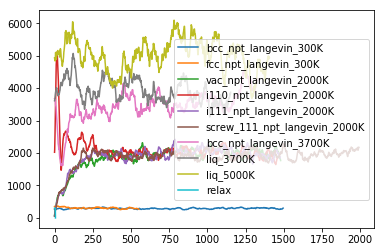

In [630]:
for key, trj in trjs.items():
    #print(i, list(zip(trj['atom_name'], trj['atom_num'])), len(trj['temp']))
    plt.plot(trj['temp'], label=key)

plt.legend()
plt.show()

In [631]:
def get_msd(xyzs):
    """Return mean squared displacement (msd) for a given trajectory (traj)."""
    msd = []
    for rs in xyzs:
        msd.append(np.mean((rs - xyzs[0])**2))
    #msd = [0.0 for _ in range(len(xyzs))]
    return np.array(msd)

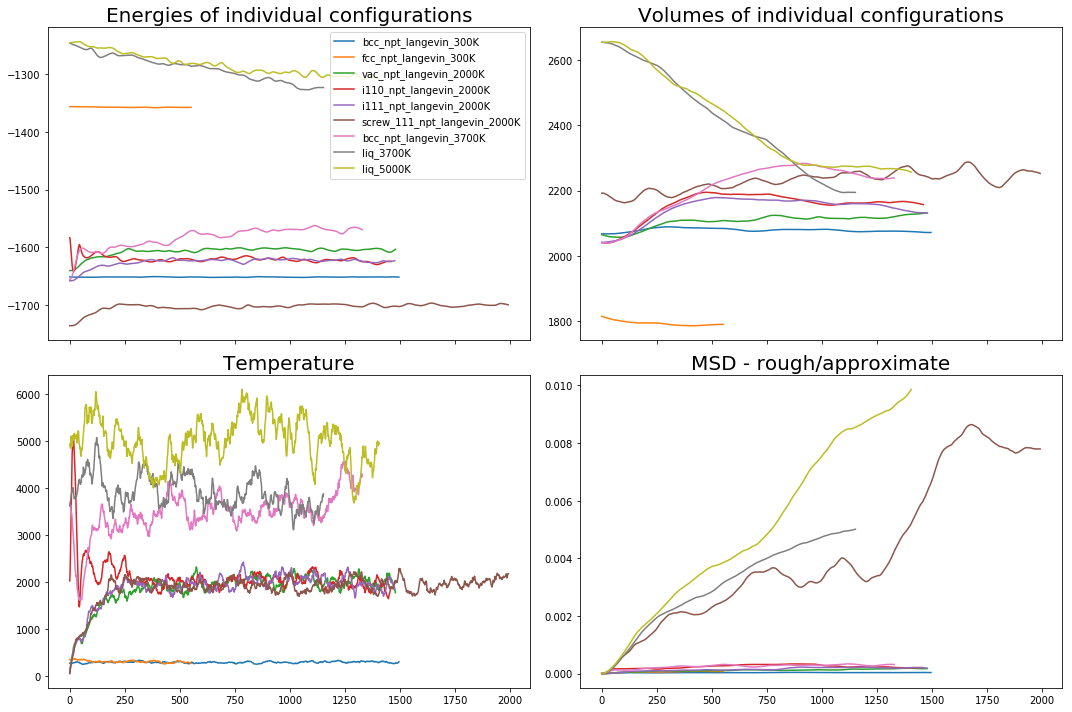

In [632]:
fig, axes = plt.subplots(2, 2, sharex='col', figsize=(15,10))

for key, traj in trjs.items():
    if 'relax' in key:
        continue

        
    #axes[0,0].plot([e/x.shape[0] for e, x in zip(traj['energy'], traj['xyz'])], label=dset)
    if 'screw' in key:
        axes[0,0].plot([e for e, x in zip(traj['energy'], traj['xyz'])], label=key)
        axes[0,1].plot([np.linalg.det(b) for b in traj['box']], label=key)
    else:
        axes[0,0].plot([e for e, x in zip(traj['energy'], traj['xyz'])], label=key)
        axes[0,1].plot([np.linalg.det(b) for b in traj['box']], label=key)


    axes[1,0].plot([t for t in traj['temp']], label=key)

    msd = get_msd(traj['xyz'])
    axes[1,1].plot(msd, label=key)

axes[0,0].legend()
axes[0,0].set_title('Energies of individual configurations', fontsize=20)
axes[0,1].set_title('Volumes of individual configurations', fontsize=20)       
axes[1,0].set_title('Temperature', fontsize=20)
axes[1,1].set_title('MSD - rough/approximate', fontsize=20)
fig.tight_layout()

In [633]:
[(k, len(v['energy'])) for k, v in trjs.items()]

[('bcc_npt_langevin_300K', 1496),
 ('fcc_npt_langevin_300K', 552),
 ('vac_npt_langevin_2000K', 1480),
 ('i110_npt_langevin_2000K', 1461),
 ('i111_npt_langevin_2000K', 1477),
 ('screw_111_npt_langevin_2000K', 1992),
 ('bcc_npt_langevin_3700K', 1329),
 ('liq_3700K', 1153),
 ('liq_5000K', 1406),
 ('relax', 7)]

In [634]:
cuts = {'bcc_npt_langevin_300K':100,
        'fcc_npt_langevin_300K':50,
        'vac_npt_langevin_2000K':300,
        'i110_npt_langevin_2000K':700,
        'i111_npt_langevin_2000K':700,
        'screw_111_npt_langevin_2000K':600,
        'bcc_npt_langevin_3700K':500,
        'liq_3700K':800,
        'liq_5000K':800,
        'relax':0}

In [635]:
trj_samples = {}
for key, traj in trjs.items():
    if 'relax' not in key:
        trj_samples[key] = traj[cuts[key]::3]
    else:
        trj_samples[key] = traj[cuts[key]:]

In [636]:
[(k, len(v['energy'])) for k, v in trj_samples.items()]

[('bcc_npt_langevin_300K', 466),
 ('fcc_npt_langevin_300K', 168),
 ('vac_npt_langevin_2000K', 394),
 ('i110_npt_langevin_2000K', 254),
 ('i111_npt_langevin_2000K', 259),
 ('screw_111_npt_langevin_2000K', 464),
 ('bcc_npt_langevin_3700K', 277),
 ('liq_3700K', 118),
 ('liq_5000K', 202),
 ('relax', 7)]

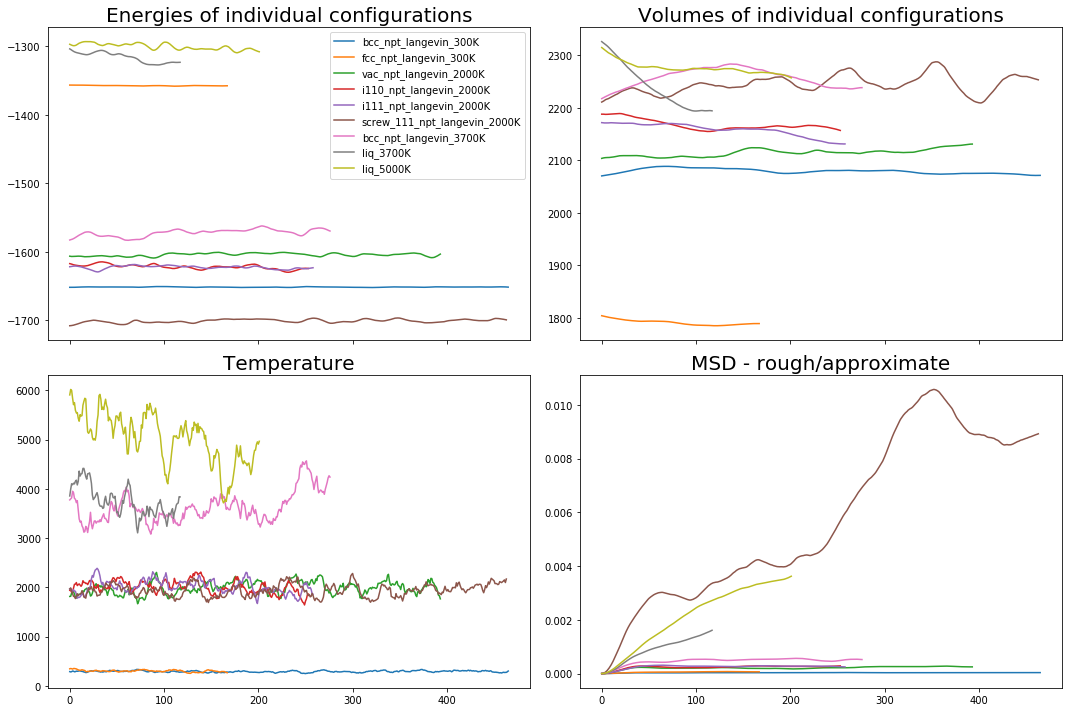

In [637]:
fig, axes = plt.subplots(2, 2, sharex='col', figsize=(15,10))

for key, traj in trj_samples.items():
    if 'relax' in key:
        continue

        
    #axes[0,0].plot([e/x.shape[0] for e, x in zip(traj['energy'], traj['xyz'])], label=dset)
    if 'screw' in key:
        axes[0,0].plot([e for e, x in zip(traj['energy'], traj['xyz'])], label=key)
        axes[0,1].plot([np.linalg.det(b) for b in traj['box']], label=key)
    else:
        axes[0,0].plot([e for e, x in zip(traj['energy'], traj['xyz'])], label=key)
        axes[0,1].plot([np.linalg.det(b) for b in traj['box']], label=key)


    axes[1,0].plot([t for t in traj['temp']], label=key)

    msd = get_msd(traj['xyz'])
    axes[1,1].plot(msd, label=key)

axes[0,0].legend()
axes[0,0].set_title('Energies of individual configurations', fontsize=20)
axes[0,1].set_title('Volumes of individual configurations', fontsize=20)       
axes[1,0].set_title('Temperature', fontsize=20)
axes[1,1].set_title('MSD - rough/approximate', fontsize=20)
fig.tight_layout()

In [638]:
weights = {k:1.0 for k in trj_samples}
weights['relax'] = 10.0

target_data = {}

for key, trj in trj_samples.items():
    
    print('dataset #', key)

    # target data
    target_dict = {'type':'trajectory', 'weight':weights[key]}
    target_dict['box'] = trj['box']
    target_dict['xyz'] = trj['xyz']
    target_dict['energy'] = trj['energy']
    target_dict['temp'] = trj['temp']

    # save inverse temperature data (if T=0, set beta=1/300)
    target_dict['beta'] = np.empty_like(target_dict['temp'])
    for i, temp in enumerate(target_dict['temp']):
        if temp == 0.0:
            target_dict['beta'][i] = 1.0/300.0
        else:
            target_dict['beta'][i] = 1.0/temp
            
    target_data[key] = target_dict

dataset # bcc_npt_langevin_300K
dataset # fcc_npt_langevin_300K
dataset # vac_npt_langevin_2000K
dataset # i110_npt_langevin_2000K
dataset # i111_npt_langevin_2000K
dataset # screw_111_npt_langevin_2000K
dataset # bcc_npt_langevin_3700K
dataset # liq_3700K
dataset # liq_5000K
dataset # relax


In [639]:
from statmechlib.preprocessing import pair_dist, get_stats_EAM, get_stats_EAM_pairdist

In [299]:
%%writefile -a ../../statmechlib/statmechlib/preprocessing/stats.py

def get_stats(stats_func, trj_samples, params):
    """
    Calculates statisitics for a given trajectory and hyperparameters.
    
    Parameters
    ----------
    stats_func: function
                calculates statistics for a single configuration
    trj_samples: dict
                set of trajectories (list of box parameters and particle configurations)
    params: list of floats
            hyperparameters (e.g., functional form of the potential)
            
    Returns
    -------
    stats_data: dict
            relevant trajectory statistics and the corresponding hyperparamters
    """

    stats_data = {}

    for key, trj in trj_samples.items():
    
        stats_dict = {'energy':[]}
        
        for ii, (xyz, box) in enumerate(zip(trj['xyz'], trj['box'])):
        
            a1, ar, a2, f1, fr, f2 = stats_func(xyz, box, params)

            stats_dict['energy'].append(np.array([ar, a2, a1]))

        stats_data[key] = stats_dict
    
    stats_data['hyperparams'] = sc
    
    return stats_data

Appending to ../../statmechlib/statmechlib/preprocessing/stats.py


dataset # bcc_npt_langevin_300K
conf 0
conf 1
conf 2
conf 3
conf 4
conf 5
conf 6
conf 7
conf 8
conf 9
conf 10
conf 11
conf 12
conf 13
conf 14
conf 15
conf 16
conf 17
conf 18
conf 19
conf 20
conf 21
conf 22
conf 23
conf 24
conf 25
conf 26
conf 27
conf 28
conf 29
conf 30
conf 31
conf 32
conf 33
conf 34
conf 35
conf 36
conf 37
conf 38
conf 39
conf 40
conf 41
conf 42
conf 43
conf 44
conf 45
conf 46
conf 47
conf 48
conf 49
conf 50
conf 51
conf 52
conf 53
conf 54
conf 55
conf 56
conf 57
conf 58
conf 59
conf 60
conf 61
conf 62
conf 63
conf 64
conf 65
conf 66
conf 67
conf 68
conf 69
conf 70
conf 71
conf 72
conf 73
conf 74
conf 75
conf 76
conf 77
conf 78
conf 79
conf 80
conf 81
conf 82
conf 83
conf 84
conf 85
conf 86
conf 87
conf 88
conf 89
conf 90
conf 91
conf 92
conf 93
conf 94
conf 95
conf 96
conf 97
conf 98
conf 99
conf 100
conf 101
conf 102
conf 103
conf 104
conf 105
conf 106
conf 107
conf 108
conf 109
conf 110
conf 111
conf 112
conf 113
conf 114
conf 115
conf 116
conf 117
conf 118
conf 11

conf 303
conf 304
conf 305
conf 306
conf 307
conf 308
conf 309
conf 310
conf 311
conf 312
conf 313
conf 314
conf 315
conf 316
conf 317
conf 318
conf 319
conf 320
conf 321
conf 322
conf 323
conf 324
conf 325
conf 326
conf 327
conf 328
conf 329
conf 330
conf 331
conf 332
conf 333
conf 334
conf 335
conf 336
conf 337
conf 338
conf 339
conf 340
conf 341
conf 342
conf 343
conf 344
conf 345
conf 346
conf 347
conf 348
conf 349
conf 350
conf 351
conf 352
conf 353
conf 354
conf 355
conf 356
conf 357
conf 358
conf 359
conf 360
conf 361
conf 362
conf 363
conf 364
conf 365
conf 366
conf 367
conf 368
conf 369
conf 370
conf 371
conf 372
conf 373
conf 374
conf 375
conf 376
conf 377
conf 378
conf 379
conf 380
conf 381
conf 382
conf 383
conf 384
conf 385
conf 386
conf 387
conf 388
conf 389
conf 390
conf 391
conf 392
conf 393
dataset # i110_npt_langevin_2000K
conf 0
conf 1
conf 2
conf 3
conf 4
conf 5
conf 6
conf 7
conf 8
conf 9
conf 10
conf 11
conf 12
conf 13
conf 14
conf 15
conf 16
conf 17
conf 18
conf 

conf 107
Replicating: 1 5 1
conf 108
Replicating: 1 5 1
conf 109
Replicating: 1 5 1
conf 110
Replicating: 1 5 1
conf 111
Replicating: 1 5 1
conf 112
Replicating: 1 5 1
conf 113
Replicating: 1 5 1
conf 114
Replicating: 1 5 1
conf 115
Replicating: 1 5 1
conf 116
Replicating: 1 5 1
conf 117
Replicating: 1 5 1
conf 118
Replicating: 1 5 1
conf 119
Replicating: 1 5 1
conf 120
Replicating: 1 5 1
conf 121
Replicating: 1 5 1
conf 122
Replicating: 1 5 1
conf 123
Replicating: 1 5 1
conf 124
Replicating: 1 5 1
conf 125
Replicating: 1 5 1
conf 126
Replicating: 1 5 1
conf 127
Replicating: 1 5 1
conf 128
Replicating: 1 5 1
conf 129
Replicating: 1 5 1
conf 130
Replicating: 1 5 1
conf 131
Replicating: 1 5 1
conf 132
Replicating: 1 5 1
conf 133
Replicating: 1 5 1
conf 134
Replicating: 1 5 1
conf 135
Replicating: 1 5 1
conf 136
Replicating: 1 5 1
conf 137
Replicating: 1 5 1
conf 138
Replicating: 1 5 1
conf 139
Replicating: 1 5 1
conf 140
Replicating: 1 5 1
conf 141
Replicating: 1 5 1
conf 142
Replicating

conf 400
Replicating: 1 5 1
conf 401
Replicating: 1 5 1
conf 402
Replicating: 1 5 1
conf 403
Replicating: 1 5 1
conf 404
Replicating: 1 5 1
conf 405
Replicating: 1 5 1
conf 406
Replicating: 1 5 1
conf 407
Replicating: 1 5 1
conf 408
Replicating: 1 5 1
conf 409
Replicating: 1 5 1
conf 410
Replicating: 1 5 1
conf 411
Replicating: 1 5 1
conf 412
Replicating: 1 5 1
conf 413
Replicating: 1 5 1
conf 414
Replicating: 1 5 1
conf 415
Replicating: 1 5 1
conf 416
Replicating: 1 5 1
conf 417
Replicating: 1 5 1
conf 418
Replicating: 1 5 1
conf 419
Replicating: 1 5 1
conf 420
Replicating: 1 5 1
conf 421
Replicating: 1 5 1
conf 422
Replicating: 1 5 1
conf 423
Replicating: 1 5 1
conf 424
Replicating: 1 5 1
conf 425
Replicating: 1 5 1
conf 426
Replicating: 1 5 1
conf 427
Replicating: 1 5 1
conf 428
Replicating: 1 5 1
conf 429
Replicating: 1 5 1
conf 430
Replicating: 1 5 1
conf 431
Replicating: 1 5 1
conf 432
Replicating: 1 5 1
conf 433
Replicating: 1 5 1
conf 434
Replicating: 1 5 1
conf 435
Replicating

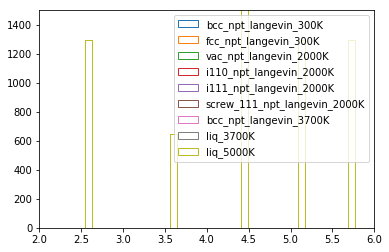

In [640]:
#sc = [2.7, 3.252, 3.804, 4.356, 4.908, 5.46]
sc = [2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 5.0, 5.5, 5.75]
index = [0, 1, 3, 5, 8, 10]


stats_data = {}

for key, trj in trj_samples.items():
    
    print('dataset #', key)
    if 'bcc_npt_'

    # statistics data
    stats_dict = {'energy':[]}
    for ii, (xyz, box) in enumerate(zip(trj['xyz'], trj['box'])):
        print('conf', ii)
        
        a1, ar, a2, f1, fr, f2 = get_stats_EAM_pairdist(xyz, box, sc=sc)

        #print(xyz.shape, box)
        #print('x', a1.shape, rr.shape, np.sum(np.abs(a1)))
        print('x', a1.shape, ar, a1, a2)
        
        stats_dict['energy'].append(np.array([ar, a2, a1]))
        #stats_dict['forces'].append(np.array([fr, f2, f1]))
               # add dataset
            
        #print('conf:', len(traj['xyz']), box.max())
        # plot pair distances - 
        #if ii == 10:
        #    plt.hist(rr.flatten(),100, alpha=1.0,label=key, histtype='step')
        #    plt.xlim(2,6)
        #    plt.ylim(0,1500)
            
    plt.legend()
    stats_data[key] = stats_dict

In [641]:
stats_data['function'] = 'EAM-cubic-spline'
stats_data['hyperparams'] = sc

In [642]:
with open(os.path.join(working, "target_full.pickle"), 'wb') as fo:
    pickle.dump(target_data, fo)
    
with open(os.path.join(working, "stats_full.pickle"), 'wb') as fo:
    pickle.dump(stats_data, fo)

In [25]:
#%%writefile -a ../src/optimize/optscript.py

from statmechlib.forcefields import sd2_loss, utot_EAM, udif_print
from scipy.optimize import fmin

In [5]:
#%%writefile -a ../src/optimize/optscript.py

# load target data
with open(os.path.join(working, 'target_full'+'.pickle'), 'rb') as fi:
    targ_dict = pickle.load(fi)

# load stats data
with open(os.path.join(working, 'stats_full'+'.pickle'), 'rb') as fi:
    stats_dict = pickle.load(fi)

In [21]:
stats_dict['relax']['energy'][0]

array([[0.00000000e+00, 0.00000000e+00, 4.25180419e+01, 1.24207591e+02,
        2.36818624e+02, 3.80307304e+02, 5.50075702e+02, 7.42587342e+02,
        9.55351083e+02, 1.44289944e+03, 2.02683799e+03, 2.36136189e+03],
       [0.00000000e+00, 0.00000000e+00, 1.55834322e+00, 1.13491318e+02,
        1.49980055e+03, 9.97490469e+03, 4.36576082e+04, 1.44997415e+05,
        3.97211755e+05, 2.06687564e+06, 8.04722665e+06, 1.48258735e+07],
       [0.00000000e+00, 0.00000000e+00, 1.41233116e+01, 1.20527543e+02,
        4.38148913e+02, 1.12995035e+03, 2.36393186e+03, 4.30809344e+03,
        7.13043509e+03, 1.62653030e+04, 3.20943143e+04, 4.35627341e+04]])

In [ ]:
array([[0.00000000e+00, 0.00000000e+00, 1.24207591e+02, 3.80307304e+02,
        9.55351083e+02, 2.02683799e+03],
       [0.00000000e+00, 0.00000000e+00, 1.13491318e+02, 9.97490469e+03,
        3.97211755e+05, 8.04722665e+06],
       [0.00000000e+00, 0.00000000e+00, 1.20527543e+02, 1.12995035e+03,
        7.13043509e+03, 3.20943143e+04]])

In [9]:
#%%writefile -a ../src/optimize/optscript.py

# load stats data
with open(os.path.join(working, 'pars_in'+'.pickle'), 'rb') as fi:
    pars_dict = pickle.load(fi)

In [10]:
stats_dict.keys()

dict_keys(['bcc_npt_langevin_300K', 'fcc_npt_langevin_300K', 'vac_npt_langevin_2000K', 'i110_npt_langevin_2000K', 'i111_npt_langevin_2000K', 'screw_111_npt_langevin_2000K', 'bcc_npt_langevin_3700K', 'liq_3700K', 'liq_5000K', 'relax', 'function', 'hyperparams'])

In [11]:
#%%writefile -a ../src/optimize/optscript.py
pars_in = [pars_dict['embed'][0], pars_dict['embed'][2], *pars_dict['pair']]
print(pars_in)

[-0.4093427610992626, 0.0, 0.8307314918975489, 6.306463298847209, 2.569446338927059, -0.21327208205268988, -0.22254590199235236, 0.02984117320348275]


In [12]:
# eliminate fcc and screw dislocation from the 'relax' datasets

#stats_dict['relax']['energy'] = [ x for i, x in enumerate(stats_dict['relax']['energy']) if i in [0, 1, 2, 3, 4, 6] ]

#for key in targ_dict['relax']:
#    if 'type' not in key and 'weight' not in key:
#        print(key, len(targ_dict['relax'][key]))
#        targ_dict['relax'][key] = [ x for i, x in enumerate(targ_dict['relax'][key]) if i in [0, 1, 2, 3, 4, 6] ]
#        print(len(targ_dict['relax'][key]))

In [13]:
# Final scaling and normalization of data
# %load ../src/optimize/optscript.py

# scale energies (subtract energy of an isolated atom)
# determine interaction energy
print(targ_dict['relax']['energy'][0], len(targ_dict['relax']['xyz'][0]))
u_t = targ_dict['relax']['energy'][0]/len(targ_dict['relax']['xyz'][0])
u_e = -8.9 # external energy from atom (experimental)
u_i = u_t - u_e # internal energy per atom (to be subtracted from all atoms)
print(u_t, u_e, u_i)

emin = 0.0
esum = 0.0
isum = 0.0
lemin = 0.0
lesum = 0.0
lisum = 0.0
for key, trj in targ_dict.items():
    for i in range(len(targ_dict[key]['energy'])):
        targ_dict[key]['energy'][i] -= u_i*targ_dict[key]['xyz'][i].shape[0]
        enex = targ_dict[key]['energy'][i]/targ_dict[key]['xyz'][i].shape[0]

        if 'fcc' in key:
            esum += enex
            isum += 1.0
            if enex < emin:
                imin = i
                #print(enex)
                emin = enex
                xmin = targ_dict[key]['xyz'][i]
                bmin = targ_dict[key]['box'][i]
                smin = stats_dict[key]['energy'][i]

        if 'liq_5000K' in key:
            lesum += enex
            lisum += 1.0
            if enex < lemin:
                limin = i
                #print(enex)
                lemin = enex
                lxmin = targ_dict[key]['xyz'][i]
                lbmin = targ_dict[key]['box'][i]
                lsmin = stats_dict[key]['energy'][i]
                lnat = targ_dict[key]['xyz'][i].shape[0]

print('Emin', emin, esum/isum)

# temporary fix - set fcc energy at 0K to minimum energy of 300K trajectory
targ_dict['relax']['energy'][1] = emin*targ_dict['relax']['xyz'][1].shape[0]
targ_dict['relax']['xyz'][1] = xmin
targ_dict['relax']['box'][1] = bmin
stats_dict['relax']['energy'][1] = smin

targ_dict['relax']['energy'][5] = lemin*lnat
targ_dict['relax']['xyz'][5] = lxmin
targ_dict['relax']['box'][5] = lbmin
stats_dict['relax']['energy'][5] = lsmin

targ_dict['relax']['energy'][-1] = 0.0
print('OK energies:', targ_dict['relax']['energy'])

-1656.1778 128
-12.9388890625 -8.9 -4.038889062499999
Emin -8.538319270833334 -8.531128673390661
OK energies: [-1139.2, -922.13848125, -1127.1888890625, -1136.4686109375002, -1136.8212109375002, -853.1647359375, 0.0]


In [14]:
targ_dict['relax']['weight'] = 30.0
print([targ_dict[k]['weight'] for k in targ_dict])

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 30.0]


In [17]:
index = [0, 1, 3, 5, 8, 10]
index = np.array([True if i in index else False for i in range(len(stats_dict['hyperparams']))])

In [18]:
def select_nodes(stats_input, index):
    """
    Select only configuration statistics from stats (spline nodes) that are given in index.
    """
    
    stats_select = copy.deepcopy(stats_input)
    
    for key, stats in stats_select.items():
        if type(stats) == dict and 'energy' in stats.keys():
            for i, conf in enumerate(stats['energy']):
                new_conf = np.empty((3, sum(index)), dtype=float)
                new_conf[0] = conf[0][index]
                new_conf[1] = conf[1][index]
                new_conf[2] = conf[2][index]
                stats['energy'][i] = new_conf
                
    stats_select['hyperparams'] = list(np.array(stats_select['hyperparams'])[index])

    return stats_select

In [19]:
stats_opt = select_nodes(stats_dict, index)

In [20]:
stats_opt['relax']['energy'][0]

array([[0.00000000e+00, 0.00000000e+00, 1.24207591e+02, 3.80307304e+02,
        9.55351083e+02, 2.02683799e+03],
       [0.00000000e+00, 0.00000000e+00, 1.13491318e+02, 9.97490469e+03,
        3.97211755e+05, 8.04722665e+06],
       [0.00000000e+00, 0.00000000e+00, 1.20527543e+02, 1.12995035e+03,
        7.13043509e+03, 3.20943143e+04]])

In [720]:
stats_opt['hyperparams']

[2.5, 2.75, 3.25, 3.75, 4.5, 5.5]

In [28]:
# prepare data for fitting
stats = []
target = []
for key in list(targ_dict.keys()):
    stats.append(stats_opt[key])
    target.append(targ_dict[key])

In [23]:
pars_in1 = [pars_dict['embed'][0], pars_dict['embed'][2], *pars_dict['pair']]
multi_pars = [pars_in1]

In [31]:
pars = multi_pars[0]
sd_ini = sd2_loss(list(pars), stats, target, utot_EAM)
print('Initial sd2:', sd_ini)
output = fmin(sd2_loss, pars, args=(stats, target, utot_EAM), maxiter=100000, maxfun=100000, disp=0, full_output=1,ftol=1e-6)
params_uopt = output[0]
print('Opt #', 0, output[1:])
print("Optimized parameters:")
print(*params_uopt)

Initial sd2: 0.08566277814829171
Opt # 0 (3.841432175551178e-06, 1240, 1880, 0)
Optimized parameters:
-2.1069845551711035 -0.00017252750753298884 -23.85894112644381 21.671206238474635 -4.571588299910712 3.4927230616269656 -1.081919703873181 0.4162234518024407


In [655]:
# Formatting for optimization


# prepare parameters for fitting
multi_pars = []

pars_in1 = [pars_dict['embed'][0], pars_dict['embed'][2], *pars_dict['pair']]
#multi_pars = [np.array(pars_in)]
pars_in2 = [-1.17194534819, 4.9212636569e-05, 0.0960596087037, 16.9530837862, -1.26438173901, 2.1048867031, -0.912012405654, 0.113324291952]
#multi_pars.append(np.array(pars_in))
pars_in1 = [-0.6169796280549427, 0.00010563526234385224, 0.3044078692520532, 6.65890926803851, -1.1489327923874284, 2.2081284218733765, -1.5236567484357728, 0.21922639345669304]
pars_in2 = [-1.4592640134931716, -3.0515321379039898e-05, -0.06397036119840327, 12.43462333841233, -1.4039556209239763, 2.277361245273334, -1.3383612333938921, 0.35119549556765894]

pars_in1 = [-3.2512467172281996, -0.0003202150380230016, 0.15269806859034524, 11.969935407675626, -0.6164601815938373, 2.2310427435982905, -0.9802667652058299, 0.6418078671434688]
pars_in2 = [-2.445149490918154, -0.00020801983958736083, -0.2640494502785708, 0.204150653694475, -0.8354501676207835, 2.5231913314784125, -1.1085851952767731, 0.5027740347187062,]
pars_in3 = [-0.7440002542627315, 1.3187608684512786e-05, -131.04373074002945, 30.6115049563255, -7.626040158485056, 4.444445847922796, -1.2013317345405128, 0.15543885566625482]
pars_in4 = [-1.7137448204475763, -0.00011755210619538186, -10.1156046958838, 18.032250182295456, -4.981378715695071, 3.688719146265372, -1.1431613580572852, 0.34723353452410854]

pars_in1 = [-2.9376727625275185, -0.00028022535517750524, -0.06998899879559964, 8.988902981345005, -1.133979308034288, 2.484611922799483, -1.0173639391284288, 0.5833969384340463]
pars_in2 = [-2.3436680210936442, -0.0002067565260307982, -134.89037863511976, 27.962504525433765, -4.032672086835333, 3.247698323035168, -0.9987257996581616, 0.4513984121355687]
pars_in3 = [-0.8995317581781127, -1.2233561504472977e-05, -150.5525413026948, 40.17212749365491, -8.477591070776592, 4.582710884516496, -1.1420118895802114, 0.172979770984942]
pars_in4 = [-1.7137448204475763, -0.00011755210619538186, -10.1156046958838, 18.032250182295456, -4.981378715695071, 3.688719146265372, -1.1431613580572852, 0.34723353452410854]

pars_in1 = [-3.004270792293166, -0.000292843788870708, -49.140610378337, 19.78377322180363, -2.1254890071331394, 2.677100169824965, -0.9715996036930384, 0.5849112609684701]

multi_pars.append(np.array(pars_in1))
multi_pars.append(np.array(pars_in2))
multi_pars.append(np.array(pars_in3))
multi_pars.append(np.array(pars_in4))

for _ in range(5):
    pars = np.array(pars_in1)
    pars += np.random.standard_normal(pars.shape)*0.01
    multi_pars.append(pars)

for _ in range(5):
    pars = np.array(pars_in2)
    pars += np.random.standard_normal(pars.shape)*0.01
    multi_pars.append(pars)

for _ in range(5):
    pars = np.array(pars_in3)
    pars += np.random.standard_normal(pars.shape)*0.01
    multi_pars.append(pars)

for _ in range(5):
    pars = np.array(pars_in4)
    pars += np.random.standard_normal(pars.shape)*0.01
    multi_pars.append(pars)
    
for _ in range(5):
    pars = 0.5*(np.array(pars_in1) + np.array(pars_in2))
    pars += np.random.standard_normal(pars.shape)*0.01
    multi_pars.append(pars)

In [656]:
optimal_parameters = []
for i, pars in enumerate(multi_pars):
    sd_ini = sd2_loss(list(pars), stats, target, utot_EAM)
    print('Initial sd2:', sd_ini)
    output = fmin(sd2_loss, list(pars), args=(stats, target, utot_EAM), maxiter=100000, maxfun=100000, disp=0, full_output=1,ftol=1e-6)
    params_uopt = output[0]
    print('Opt #', i, output[1:])
    print("Optimized parameters:")
    print(*params_uopt)
    optimal_parameters.append(tuple([output[1:], params_uopt]))

Initial sd2: 3.662804851630848e-06
Opt # 0 (2.4643998973402667e-06, 1074, 1678, 0)
Optimized parameters:
-3.0292035500502577 -0.0002973878339795557 -73.98056675996179 21.37679979072087 -2.1579585659548726 2.674194817681574 -0.9533791685177233 0.5865129915924295
Initial sd2: 7.1204748560323974e-06
Opt # 1 (2.057922979348631e-06, 738, 1181, 0)
Optimized parameters:
-2.3497018172188096 -0.0002057171446720351 -145.04797226842794 28.375384166184787 -3.9427941436434555 3.2099207125561167 -1.0041301955811968 0.45383577332853386
Initial sd2: 1.2014159490807805e-05
Opt # 2 (7.326245746534736e-06, 1178, 1818, 0)
Optimized parameters:
-0.8790058703592305 -8.406973920436098e-06 -271.37488142550353 45.17706532652444 -8.278925904956822 4.496839655395635 -1.1179229359507072 0.16539114019029078
Initial sd2: 6.124780477234909e-06
Opt # 3 (3.217850381650512e-06, 1316, 2017, 0)
Optimized parameters:
-1.7445838196192152 -0.00012512506827247472 -192.8926770970192 35.14910039013272 -5.779871088706187 3.7611

In [657]:
with open(os.path.join(working, 'output_many.pickle'), 'rb') as fi:
    optimal_list = pickle.load(fi)

if type(optimal_list) != list:
    optimal_list = [optimal_list]

optimal_list.append(optimal_parameters)

with open(os.path.join(working, 'output_many.pickle'), 'wb') as fo:
    pickle.dump(optimal_list, fo)

In [ ]:
-3.0292035500502577 -0.0002973878339795557 -73.98056675996179 21.37679979072087 -2.1579585659548726 2.674194817681574 -0.9533791685177233 0.5865129915924295
-2.8434804875864783 -0.0002766750806286241 -104.36893959287706 32.76790446459523 -3.89903766812069 3.100050720780845 -0.9314451985894534 0.5393376795583342

6
0 2.4643998973402667e-06
[-3.02920355e+00 -2.97387834e-04 -7.39805668e+01  2.13767998e+01
 -2.15795857e+00  2.67419482e+00 -9.53379169e-01  5.86512992e-01]
Targ: [-1139.2, -922.13848125, -1127.1888890625, -1136.4686109375002, -1136.8212109375002, -853.1647359375]
[0.046875   0.05555556 0.04724409 0.04651163 0.04651163 0.05309735]
1 2.057922979348631e-06
[-2.34970182e+00 -2.05717145e-04 -1.45047972e+02  2.83753842e+01
 -3.94279414e+00  3.20992071e+00 -1.00413020e+00  4.53835773e-01]
4 2.444163490627411e-06
[-2.87216025e+00 -2.77076819e-04 -4.35792686e+01  2.28361048e+01
 -2.93973991e+00  2.90737614e+00 -9.75135365e-01  5.56052277e-01]
9 2.6600773970168575e-06
[-2.07050824e+00 -1.69093913e-04 -1.90641036e+02  2.95988067e+01
 -4.45042329e+00  3.39804009e+00 -1.02100418e+00  3.99234371e-01]
24 2.665862906036206e-06
[-2.60364436e+00 -2.39963145e-04 -1.95352607e+02  2.65652454e+01
 -2.81026153e+00  2.87269233e+00 -9.61270288e-01  5.01178136e-01]
27 2.712361104730843e-06
[-2.84348049e+00 -2

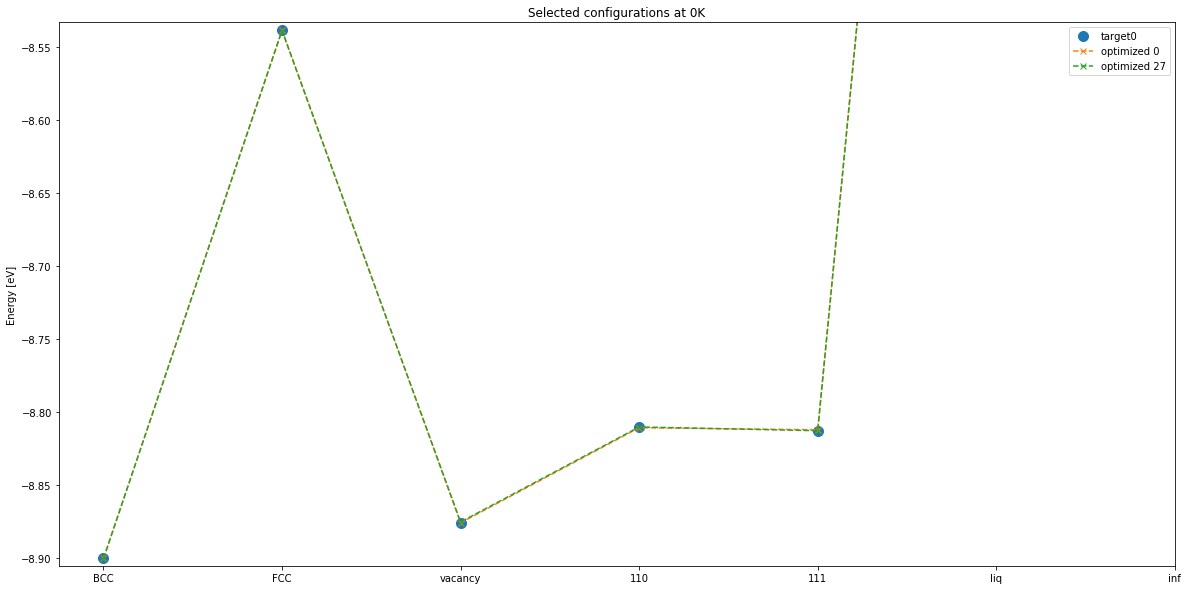

In [701]:
plt.figure(figsize=(20,10))

nat = np.array([len(x) for x in targ_dict['relax']['xyz']])[:-1]
print(len(nat))

for i, params_uopt in enumerate(optimal_parameters):
    if params_uopt[0][0] > 3e-6:
        continue
    print(i, params_uopt[0][0])
    print(params_uopt[1])

    opti_out, targ_out = udif_print(params_uopt[1], stats, target, utot_EAM)
    plt.title('Selected configurations at 0K')
    if i == 0:
        print('Targ:', targ_out[-1][:-1])
        #nat = np.array([len(x) for x in targ_dict['relax']['xyz']])
        print(len(np.array(targ_out[-1][:-1]))/nat)
        plt.plot(np.array(targ_out[-1][:-1])/nat, 'o', label='target'+str(i), markersize=10)

    if i != 0 and i != 27:
        continue
        
    #print('Opti:', [o for o in opti_out[-1][:-1]])
    plt.plot(np.array([o for o in opti_out[-1][:-1]])/nat, 'x--', label='optimized '+str(i))
#    else:
#        plt.plot([o for o in opti_out[-1][:-1]], 'x--', label='optimized '+str(i))
#        plt.plot(targ_out[-1][:-1], 'o', markersize=10)

plt.xticks([0, 1, 2, 3, 4, 5, 6], ['BCC','FCC', 'vacancy','110','111','liq','inf'])
plt.ylabel('Energy [eV]')
#plt.ylim(-1145, -1136)
plt.ylim(-8.905, -8.533)
plt.legend()

0 2.4643998973402667e-06
1 2.057922979348631e-06
2 7.326245746534736e-06
3 3.217850381650512e-06
4 2.444163490627411e-06
5 3.2080761828815534e-06
6 1.3673328760171909e-05
7 6.527748395075841e-06
8 3.216656851111966e-05
9 2.6600773970168575e-06
10 4.637822797250685e-06
11 4.007535777379554e-06
12 3.2706475730509594e-06
13 4.387028372049583e-06
14 1.9272733351947695e-05
15 1.0927657315215259e-05
16 4.786660329642195e-06
17 8.502348023260957e-06
18 8.971369953805196e-06
19 2.3652192254581873e-05
20 2.09975694968802e-05
21 6.577234310396308e-06
22 4.32817803736593e-06
23 3.7311625513009874e-06
24 2.665862906036206e-06
25 3.5372065648288203e-06
26 1.117679955429139e-05
27 2.712361104730843e-06
28 3.524136077501471e-06


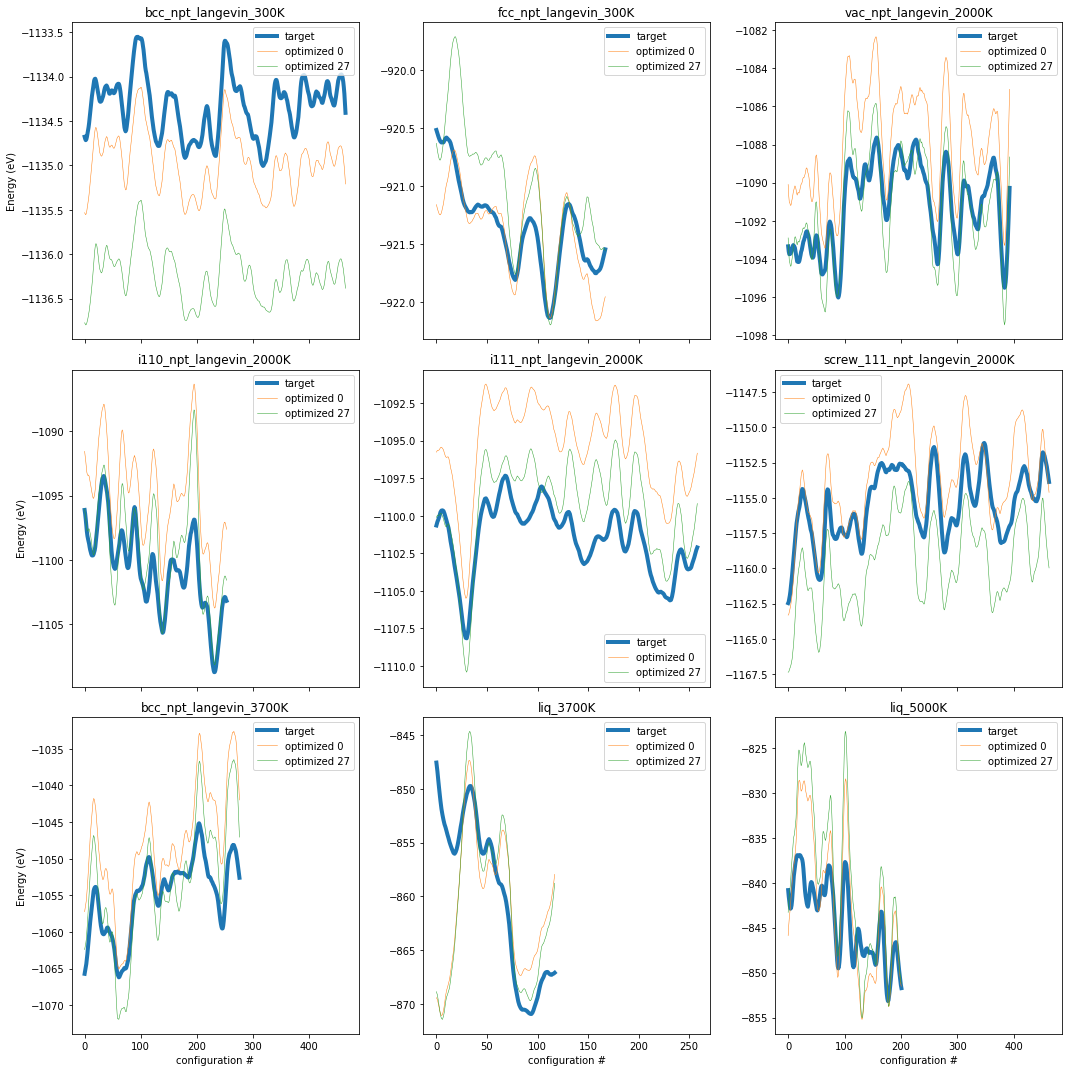

In [702]:
names = ['bcc_npt_langevin_300K',
            'fcc_npt_langevin_300K',
            'vac_npt_langevin_2000K',
            'i110_npt_langevin_2000K',
            'i111_npt_langevin_2000K',
            'screw_111_npt_langevin_2000K',
            'bcc_npt_langevin_3700K',
            'liq_3700K',
            'liq_5000K']

#x = np.array([-1.17194534819, 4.9212636569e-05, 0.0960596087037, 16.9530837862, -1.26438173901, 2.1048867031, -0.912012405654, 0.113324291952])
#optimal_parameters.append(tuple([[3.2627338939720861e-06, 0.0], x]))

fig, axes = plt.subplots(3, 3, sharex='col', figsize=(15,15))

for ip, params_uopt in enumerate(optimal_parameters):

    print(ip, params_uopt[0][0])
    opti_out, targ_out = udif_print(params_uopt[1], stats, target, utot_EAM)

    for i, (tar, opt) in enumerate(zip(targ_out[:-1], opti_out[:-1])):
        x, y = divmod(i, 3)
        tar = np.array(tar)
        opt = np.array(opt)
        #print(names[i], (tar.mean() - opt.mean())/target[i]['xyz'][0].shape[0])
        #opt += tar.mean() - opt.mean()
        #print(ip)
        if ip == 0:#len(optimal_parameters)-1:
            axes[x,y].plot(tar, '-', label='target', linewidth=4)

        if params_uopt[0][0] > 3e-6:
            continue
        if ip != 0 and ip != 27:
            continue
        if ip == 0:#len(optimal_parameters)-1:
            axes[x,y].plot(opt, '-', label='optimized '+str(ip), linewidth=0.5)
        
            if y == 0:
                axes[x,y].set_ylabel('Energy (eV)')
            else:
                axes[x,y].set_ylabel('')

            if x == 2:
                axes[x,y].set_xlabel('configuration #')
            else:
                axes[x,y].set_xlabel('')

            axes[x,y].set_title(names[i])
        else:
            if ip == 0:
                axes[x,y].plot(opt, '-', label='optimized '+ str(ip), linewidth=3)
            else:
                axes[x,y].plot(opt, '-', label='optimized '+ str(ip), linewidth=0.5)
            axes[x,y].set_title(names[i])

        
        axes[x,y].legend()

        
fig.tight_layout()

dataset # bcc_npt_langevin_300K
dataset # fcc_npt_langevin_300K
dataset # vac_npt_langevin_2000K
dataset # i110_npt_langevin_2000K
dataset # i111_npt_langevin_2000K
dataset # screw_111_npt_langevin_2000K
dataset # bcc_npt_langevin_3700K
dataset # liq_3700K
dataset # liq_5000K
dataset # relax


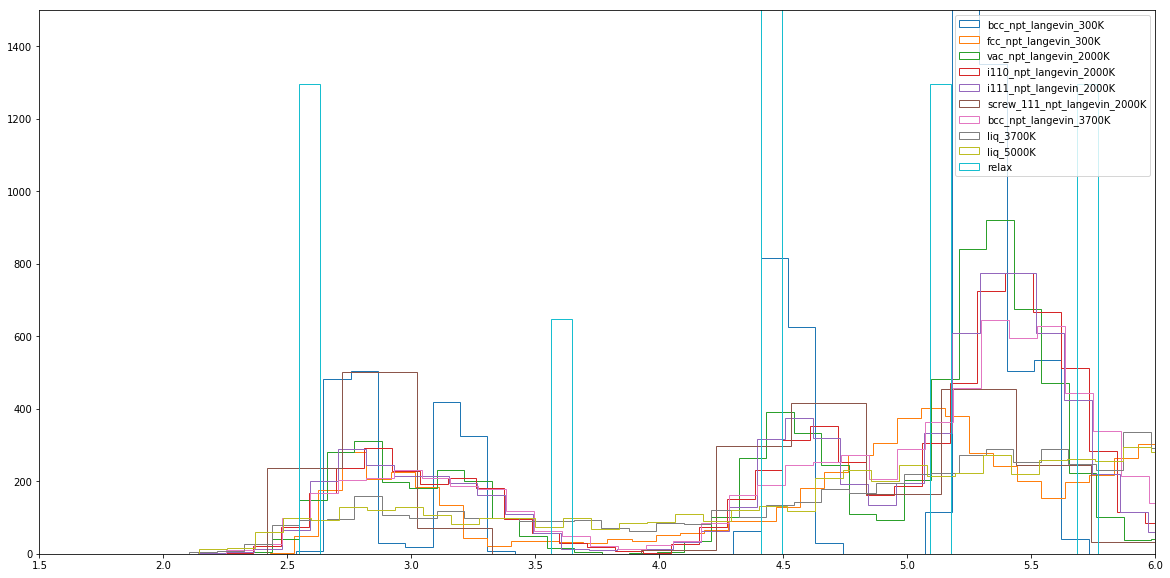

In [669]:
plt.figure(figsize=(20,10))

for key, trj in trj_samples.items():
    
    print('dataset #', key)

    # statistics data
    for ii, (xyz, box) in enumerate(zip(trj['xyz'], trj['box'])):
        if ii > 1:
            break
                    
        rr, rx = pair_dist(xyz, box)

        if ii == 1:
            plt.hist(rr.flatten(),100, alpha=1.0,label=key, histtype='step')
            plt.xlim(1.5,6)
            plt.ylim(0,1500)
            
    plt.legend()

In [ ]:
2.74, 3.25, 3.75, 4.5, 5.48

In [703]:
f_spline = lambda r, aa, kk: sum([a*(rk - r)**3 for a, rk in zip(aa, kk) if r < rk and r > 0.01])

# electronic density function (cubic splines)
#rho = lambda r, a, k: sum([c*(p - r)**3 for c, p in zip(a, k) if r < p])

rho = f_spline

# embedding function
F = lambda d, a: a[0]*d**0.5 + a[1]*d + a[2]*d**2

# pair potential function (same spline form as electronic density)
V = rho

V = lambda r, aa, cc: sum([a*(rc - r)**3 for a, rc in zip(aa, cc) if r < rc])

# Embedding function. Parameters: electronic density (d), coefficients for 1/2, 1, and 2 powers of density
F = lambda d, a: a[0]*d**0.5 + a[1]*d + a[2]*d**2

# Cohesive potential (cubic splines - same form as V)
phi = V

In [704]:
rho_a = [1.0]
rho_r = [stats_opt['hyperparams'][-1]]

pair_a = pars_in1[2:]
pair_r = stats_opt['hyperparams']

many_a = [pars_in[0], 0.0, pars_in[1]]

In [705]:
# Ranges of densities and separations

nr = 5000
rcut = stats_opt['hyperparams'][-1]
dr = rcut/nr

rhomax = 12.0*phi(1.5, rho_a, rho_r)
print('rhomax:', rhomax)
#rhomax = 1000.0
nrho = 5000
drho = rhomax/nrho

ri = 1.0
ro = 2.0

# W properties
na = 74
ma = 183.84
lc = 3.1653
alat = 'bcc'

# System composition
n_el = 1
el_name = ['W']

rhomax: 768.0


In [706]:
def u_trans(r, unucl, ueq, ri=1.0, ro=2.0):
    """Transition between the core and equillibrium potentials"""
    if r < ri:
        return unucl
    elif r < ro:
        x = (ro + ri - 2*r)/(ro - ri)
        eta = 3/16*x**5 - 5/8*x**3 + 15/16*x + 1/2
        return ueq + eta*(unucl - ueq)
    else:
        return ueq

In [707]:
from statmechlib.forcefields import u_core

# prepare lists of values
dens = np.linspace(0., rhomax-drho, nrho, endpoint=True)
r = np.linspace(0., rcut-dr, nr, endpoint=True)
r2 = np.linspace(0., rcut, 201)

fembd = [F(d, many_a) for d in dens] # W
edens = np.array([phi(x, rho_a, rho_r) for x in r])

# 1. Cubic spline for r > r_o
f_outer = [V(x, pair_a, pair_r) for i, x in enumerate(r)]
# 2. Repulsive core for r < r_i (precalculate up to r_o)
f_inner = [0.0] + [u_core(x) for x in r[1:]]
# 3. Transition region for r_i < r < r_o
fpair = [x*u_trans(x, f_inner[i], f_outer[i]) for i, x in enumerate(r)]
#fpair = f_outer

In [708]:
# LAMMPS format
pot_path = '../sim/potentials'

with open(os.path.join(pot_path, 'W_lvnew.eam.fs'), 'w') as fo:
    
    # Comment section
    fo.write('Comment 1\n')
    fo.write('Comment 2\n')
    fo.write('Comment 3\n')
    
    # Number of elements
    fo.write(f"{n_el:5d} ")
    for i in range(n_el):
        fo.write(f"{el_name[i]:2}")
    fo.write("\n")
    
    # number of grid points, step size, and cutoff
    fo.write(f"{nrho:5d}{drho:24.16e}{nr:5d}{dr:24.16e}{rcut:24.16e}\n")
    
    # atomic number, mass, lattice size, lattice type
    fo.write(f"{na:5d} {ma:14.4f} {lc:14.4f} {alat:10}\n")
    
    # Embeding function
    for i in range(nrho//4):
        fo.write("{0:20.12e}{1:20.12e}{2:20.12e}{3:20.12e}\n".format(*fembd[i*4:i*4+4]))
    
    # Electronic density
    for i in range(nr//4):
        fo.write("{0:20.12e}{1:20.12e}{2:20.12e}{3:20.12e}\n".format(*edens[i*4:i*4+4]))
        
    # Pair potential
    for i in range(nr//4):
        fo.write("{0:20.12e}{1:20.12e}{2:20.12e}{3:20.12e}\n".format(*fpair[i*4:i*4+4]))